In [20]:
# reload packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


View UMAP results for baseline

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
from tfumap.paths import FIGURE_DIR, save_fig

In [23]:
from tfumap.paths import MODEL_DIR
from tfumap.semisupervised_keras import pretrained_networks

In [24]:
dataset = "fmnist"
datasets = [dataset]
aug_types = [
    "not_augmented",
    "umap_euclidean",
    "umap_learned",
    "augmented",
    "umap_augmented_learned",
    "umap_euclidean_augmented",
    "umap_over_z"
]
dset_sizes = [4, 16, 64, 256, 1024, "full"]

In [25]:
results_loc = MODEL_DIR / 'semisupervised-keras' 

In [26]:
results_df = pd.DataFrame(columns=['dataset', 'labels_per_class', 'augmented', 'timestamp', 'location', 'test_acc', 'dset_size_title'])
for dataset in datasets:

    for aug_type in aug_types:
        for dset_size in dset_sizes:
                
            dset_timestamp = pretrained_networks[dataset][aug_type][dset_size]
            dset_loc = results_loc / dataset/ str(dset_size) / dset_timestamp
            loc_list = list(dset_loc.glob('test_loss.npy'))
            if dset_size == 'full':
                if aug_type == 'augmented':
                    print(loc_list)
                    print(aug_type)
            if len(loc_list) == 0:
                print(aug_type, dset_size, dataset, dset_loc)
                continue
            test_loss, test_acc = np.load(loc_list[0])
            dset_size_title = str(dset_size)
            dset_size = str(dset_size) if dset_size is not 'full' else 4096
            results_df.loc[len(results_df)] = [
                dataset, dset_size, aug_type, dset_timestamp, dset_loc, test_acc, dset_size_title
            ]
results_df            

[PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised-keras/fmnist/full/fmnist_full____2020_08_25_17_21_42_014099_baseline_augmented/test_loss.npy')]
augmented
umap_over_z 1024 fmnist /mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised-keras/fmnist/1024
umap_over_z full fmnist /mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/semisupervised-keras/fmnist/full


,dataset,labels_per_class,augmented,timestamp,location,test_acc,dset_size_title
0,fmnist,4,not_augmented,fmnist_4____2020_08_23_14_15_38_194490_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.6068,4
1,fmnist,16,not_augmented,fmnist_16____2020_08_23_14_15_50_074976_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.7439,16
2,fmnist,64,not_augmented,fmnist_64____2020_08_23_14_16_00_145880_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8351,64
3,fmnist,256,not_augmented,fmnist_256____2020_08_23_14_14_27_904250_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8890,256
4,fmnist,1024,not_augmented,fmnist_1024____2020_08_23_14_13_39_538728_base...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9205,1024
5,fmnist,4096,not_augmented,fmnist_full____2020_08_23_14_06_13_546999_base...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9427,full
6,fmnist,4,umap_euclidean,fmnist_0.0_4____2020_08_23_18_48_03_409056_uma...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.7144,4
7,fmnist,16,umap_euclidean,fmnist_0.0_16____2020_08_23_21_25_30_890380_um...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.7845,16
8,fmnist,64,umap_euclidean,fmnist_0.0_64____2020_08_23_19_43_20_063919_um...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8410,64
9,fmnist,256,umap_euclidean,fmnist_0.0_256____2020_08_23_19_44_36_506473_u...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8846,256


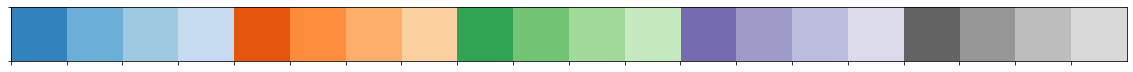

In [8]:
pal = sns.color_palette('tab20c',20)
sns.palplot(pal)

Text(0.5, 0, '# Training Examples')

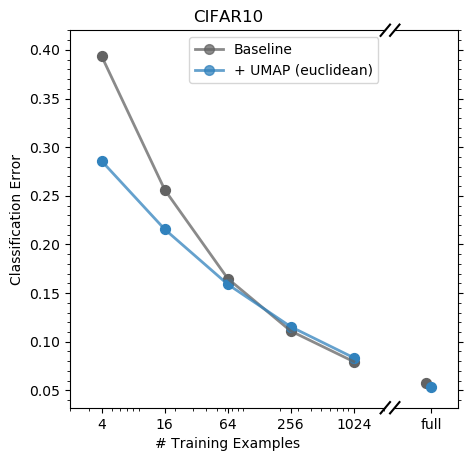

In [9]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },

    {
        "mask": results_df.augmented == 'umap_euclidean',
        "color": pal[0],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (euclidean)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 5),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, 1-acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, 1-acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
ax.set_title('CIFAR10')
ax.set_ylabel('Classification Error')
ax.set_xlabel('# Training Examples')

Text(0.605, 0, '# Training Examples')

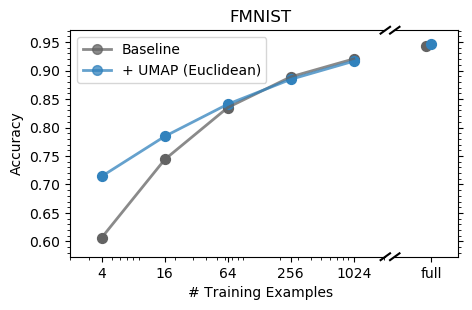

In [10]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },

    {
        "mask": results_df.augmented == 'umap_euclidean',
        "color": pal[0],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (Euclidean)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Accuracy')
ax.set_xlabel('# Training Examples', x=0.605)
#save_fig(FIGURE_DIR/(dataset + '_umap_euclidean'), save_pdf = True)

Text(0.605, 0, '# Training Examples')

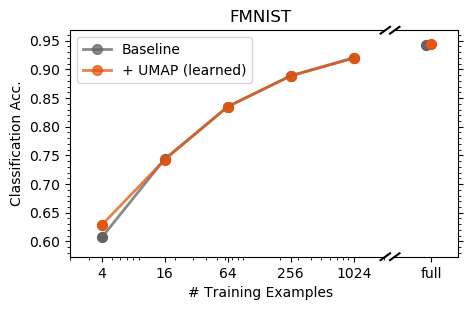

In [11]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },

    {
        "mask": results_df.augmented == 'umap_learned',
        "color": pal[4],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Classification Acc.')
ax.set_xlabel('# Training Examples', x=0.605)

Text(0.605, 0, '# Training Examples')

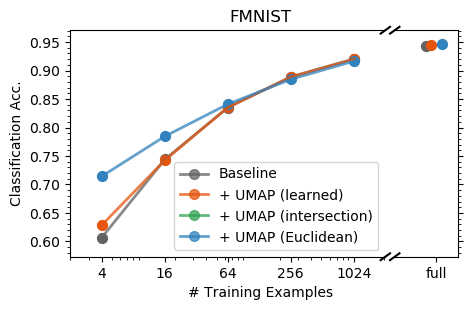

In [12]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },

    {
        "mask": results_df.augmented == 'umap_learned',
        "color": pal[4],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned)"
    },
    {
        "mask": results_df.augmented == 'umap_intersection',
        "color": pal[8],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (intersection)"
    },
    {
        "mask": results_df.augmented == 'umap_euclidean',
        "color": pal[0],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (Euclidean)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Classification Acc.')
ax.set_xlabel('# Training Examples', x=0.605)

(0.5728128453306552, 1)

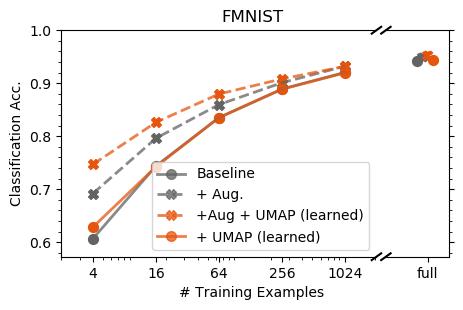

In [28]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },
    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[16],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug."
    },
    {
        "mask": results_df.augmented == 'umap_augmented_learned',
        "color": pal[4],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+Aug + UMAP (learned)"
    },
    {
        "mask": results_df.augmented == 'umap_learned',
        "color": pal[4],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (learned)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, ls=ls, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Classification Acc.')
ax.set_xlabel('# Training Examples', x=0.605)

ymin, ymax = ax.get_ylim()
ymax = 1
ax.set_ylim([ymin, ymax])

Text(0.605, 0, '# Training Examples')

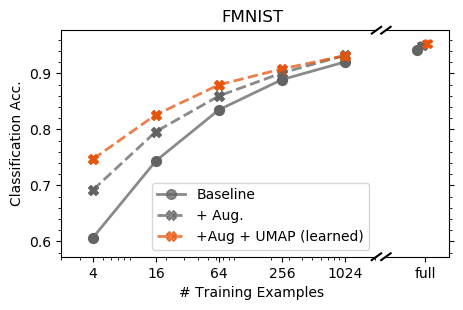

In [14]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },
    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[16],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug."
    },
    {
        "mask": results_df.augmented == 'umap_augmented_learned',
        "color": pal[4],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+Aug + UMAP (learned)"
    },
    #{
    #    "mask": results_df.augmented == 'umap_learned',
    #    "color": pal[4],
    #    "ls": 'solid',
    #    "marker": 'o',
    #    "label": "+ UMAP (learned)"
    #},

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, ls=ls, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Classification Acc.')
ax.set_xlabel('# Training Examples', x=0.605)

Text(0.605, 0, '# Training Examples')

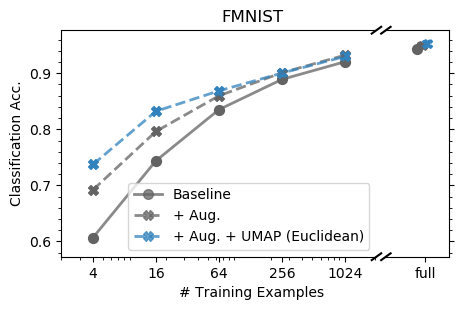

In [15]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },
    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[16],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug."
    },
    #{
    #    "mask": results_df.augmented == 'umap_euclidean',
    #    "color": pal[0],
    #    "ls": 'solid',
    #    "marker": 'o',
    #    "label": "+ UMAP (Euclidean)"
    #},
    {
        "mask": results_df.augmented == 'umap_euclidean_augmented',
        "color": pal[0],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug. + UMAP (Euclidean)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, ls=ls, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Classification Acc.')
ax.set_xlabel('# Training Examples', x=0.605)

Text(0.605, 0, '# Training Examples')

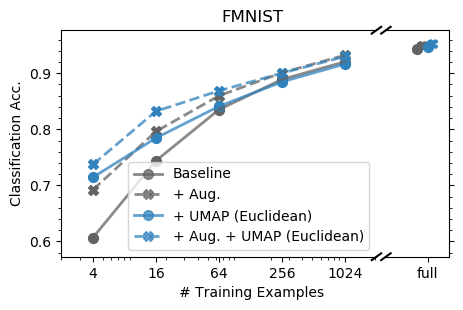

In [16]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },
    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[16],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug."
    },
    {
        "mask": results_df.augmented == 'umap_euclidean',
        "color": pal[0],
        "ls": 'solid',
        "marker": 'o',
        "label": "+ UMAP (Euclidean)"
    },
    {
        "mask": results_df.augmented == 'umap_euclidean_augmented',
        "color": pal[0],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug. + UMAP (Euclidean)"
    },

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, ls=ls, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Classification Acc.')
ax.set_xlabel('# Training Examples', x=0.605)

Text(0.605, 0, '# Training Examples')

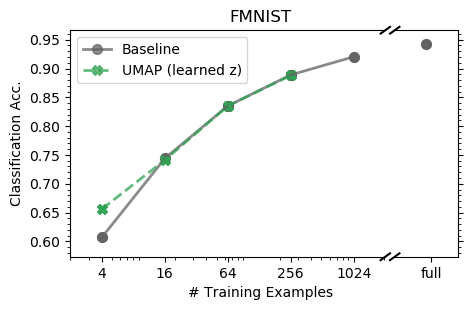

In [27]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },

    {
        "mask": results_df.augmented == 'umap_over_z',
        "color": pal[8],
        "ls": 'dashed',
        "marker": 'X',
        "label": "UMAP (learned z)"
    },
    #{
    #    "mask": results_df.augmented == 'umap_learned',
    #    "color": pal[4],
    #    "ls": 'solid',
    #    "marker": 'o',
    #    "label": "+ UMAP (learned)"
    #},

    
]


alpha = 0.75
linewidth = 2
fig, (ax, ax2) = plt.subplots(
    1,
    2,
    figsize=(5, 3),
    dpi=100,
    sharey=True,
    gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
)

for li, col_dict in enumerate(color_list):
    mask = col_dict["mask"]
    color = col_dict['color']
    ls = col_dict['ls']
    label = col_dict['label']
    marker = col_dict['marker']
    
    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    ax.scatter(nex, acc, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")
    ax.plot(nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls)  # , label = label

    subset_ds = results_df[mask]
    subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
    #display(subset_ds)
    nex = subset_ds.labels_per_class.values.astype("int")
    acc = subset_ds.test_acc.values
    nex = nex + li/100 - len(color_list)/2/100#+(np.random.rand(1)-0.5)*.025
    ax2.scatter(nex, acc, ls=ls, color=color, s=50, alpha=1, marker=marker)#, facecolors="none")

    ax.plot(
        [],
        [],
        "-" + marker,
        color=color,
        linewidth=linewidth,
        label=label,
        alpha=alpha,
        markersize=7,
        #markerfacecolor="none",
        ls=ls,
    )

ax.set_xscale("log")
ax.set_xticks([4, 16, 64, 256, 1024])
ax.set_xticklabels([4, 16, 64, 256, 1024])
#ax.set_ylim([0, 1])
ax.spines["right"].set_visible(False)
ax.legend()
ax.set_xlim([2, 2048])


# ax2.set_xscale('log')
ax2.set_xticks([4096])
ax2.set_xticklabels(["full"])
ax2.spines["left"].set_visible(False)
ax2.yaxis.tick_right()


d = 0.015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

d = 0.015
offset = 5
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

ax.minorticks_on()
ax.tick_params(axis="y", which="minor", direction="out")

if False:
    ax.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

    ax2.grid(axis="y", which="major", linestyle="-", alpha=0.5)
    ax2.grid(axis="y", which="minor", linestyle="--", alpha=0.5)

if False:
    ax.set_ylim([5e-2, 1])
    ax2.set_yscale('log')
    
    
ax.set_title(dataset.upper(), x=0.605)
ax.set_ylabel('Classification Acc.')
ax.set_xlabel('# Training Examples', x=0.605)